In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('IndiaAffectedWaterQualityAreas.csv',encoding='latin-1')
data.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [8]:
data.shape

(550242, 8)

In [4]:
data.columns

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550242 entries, 0 to 550241
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   State Name         550242 non-null  object
 1   District Name      550242 non-null  object
 2   Block Name         550242 non-null  object
 3   Panchayat Name     550242 non-null  object
 4   Village Name       550242 non-null  object
 5   Habitation Name    550242 non-null  object
 6   Quality Parameter  550242 non-null  object
 7   Year               550242 non-null  object
dtypes: object(8)
memory usage: 33.6+ MB


In [6]:
#checking water quality parameter
data.groupby('Quality Parameter').size()

Quality Parameter
Arsenic      25705
Fluoride    101041
Iron        302244
Nitrate      12329
Salinity    108923
dtype: int64

- These are major polutants

In [7]:
data.groupby('State Name').size().sort_values(ascending=False)

State Name
RAJASTHAN            131417
BIHAR                 92336
ASSAM                 79910
ORISSA                68620
KARNATAKA             30824
WEST BENGAL           30101
TRIPURA               26235
CHATTISGARH           25062
MADHYA PRADESH        14449
MAHARASHTRA           12480
UTTAR PRADESH          9918
CHHATTISGARH           8815
KERALA                 4800
JHARKHAND              3913
TAMIL NADU             3164
ANDHRA PRADESH         2888
GUJARAT                2092
PUNJAB                 1056
NAGALAND                618
ARUNACHAL PRADESH       612
MEGHALAYA               427
HARYANA                 262
HIMACHAL PRADESH         88
JAMMU AND KASHMIR        67
UTTARAKHAND              57
PUDUCHERRY               17
MANIPUR                  14
dtype: int64

- most of the records are from the state Rajasthan

In [9]:
#groping quality parameter and state names

data['Quality Parameter'].groupby(data['State Name']).describe().sort_values(by='count', ascending=False)

,count,unique,top,freq
State Name,,,,
RAJASTHAN,131417,5,Salinity,87137
BIHAR,92336,4,Iron,69970
ASSAM,79910,3,Iron,74098
ORISSA,68620,5,Iron,59905
KARNATAKA,30824,5,Fluoride,13156
WEST BENGAL,30101,4,Arsenic,12382
TRIPURA,26235,1,Iron,26235
CHATTISGARH,25062,5,Iron,24439
MADHYA PRADESH,14449,4,Fluoride,12762


In [11]:
# Taking the state kerala only

data_kerala= data[data['State Name']=='KERALA'].reset_index()
data_kerala

,index,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,61279,KERALA,MALAPPURAM,KONDOTTY,CHELEMBRA,CHELAMBRA,WARD 1,Iron,1/4/2009
1,61280,KERALA,MALAPPURAM,KONDOTTY,CHELEMBRA,CHELAMBRA,WARD 10,Nitrate,1/4/2009
2,61281,KERALA,MALAPPURAM,KONDOTTY,PALLIKKAL,PALLIKKAL,WARD 2,Iron,1/4/2009
3,61282,KERALA,MALAPPURAM,KONDOTTY,PALLIKKAL,PALLIKKAL,WARD 6,Iron,1/4/2009
4,61283,KERALA,MALAPPURAM,KONDOTTY,PALLIKKAL,PALLIKKAL,WARD 8,Iron,1/4/2009
...,...,...,...,...,...,...,...,...,...
4795,477558,KERALA,KASARAGOD,KANHANGAD,BALAL,MALOTH,WARD V,Iron,1/4/2012
4796,477559,KERALA,KASARAGOD,KANHANGAD,BALAL,MALOTH,WARD VI,Iron,1/4/2012
4797,477560,KERALA,KASARAGOD,KANHANGAD,BALAL,MALOTH,WARD VII,Iron,1/4/2012
4798,477561,KERALA,KASARAGOD,KANHANGAD,BALAL,MALOTH,WARD VIII,Iron,1/4/2012


In [12]:
data_kerala['Quality Parameter'].value_counts()

Iron        3161
Salinity     906
Fluoride     496
Nitrate      237
Name: Quality Parameter, dtype: int64

C:\Users\SUFI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Water Quality Parameter in Kerala')

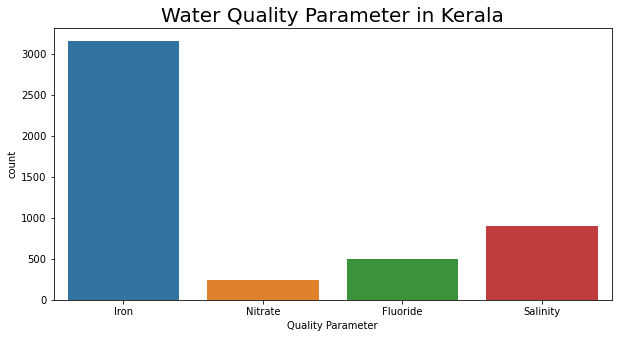

In [16]:
plt.rcParams['figure.figsize']=(10,5)
sns.countplot(data_kerala['Quality Parameter'])
plt.title('Water Quality Parameter in Kerala', size=20)

In [13]:
data['Quality Parameter'].groupby(data['District Name']).describe().sort_values(by='count', ascending=False)

,count,unique,top,freq
District Name,,,,
BARMER,43752,4,Salinity,43706
JODHPUR,32152,4,Salinity,23585
SUPAUL,12607,1,Iron,12607
PURNIA,11845,1,Iron,11845
NAGAUR,10470,3,Fluoride,8187
...,...,...,...,...
MANDI,1,1,Salinity,1
THENI,1,1,Nitrate,1
ARIYALUR,1,1,Salinity,1


Text(0.5, 1.0, 'Water Quality Parameter in Different Districts of Kerala')

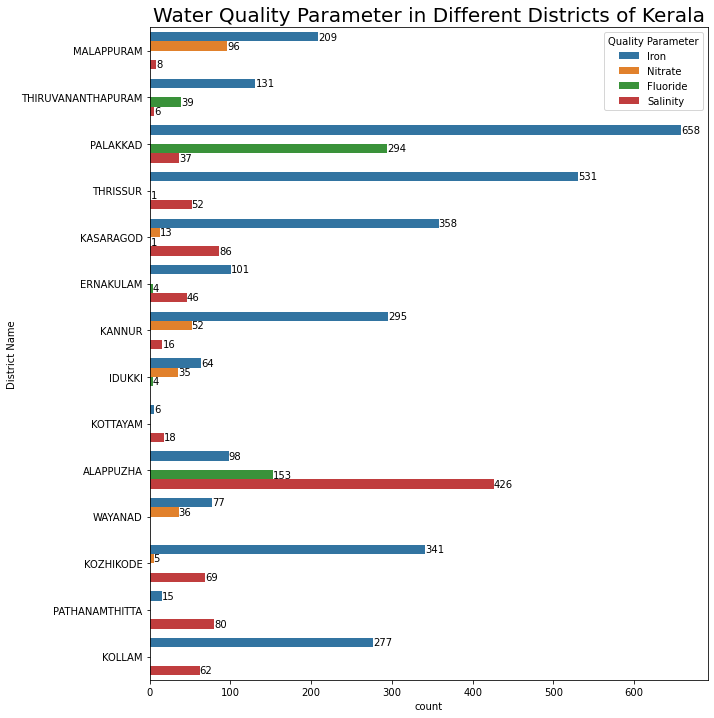

In [17]:
#which of the most district are effected by iron and salt content
plt.figure(figsize=(10,12))
ax= sns.countplot(y=data_kerala['District Name'], hue=data_kerala['Quality Parameter'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
ax.bar_label(ax.containers[3]);
plt.title('Water Quality Parameter in Different Districts of Kerala', size=20)

In [20]:
data.Year.unique()

array(['1/4/2009', '1/4/2010', '1/4/2011', '1/4/2012'], dtype=object)

In [18]:
#lets check the differnce in water quality by year

data_kerala['Year']= pd.to_datetime(data_kerala['Year'])
data_kerala['Year']= data_kerala['Year'].dt.year

In [19]:
data_kerala.head()

,index,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,61279,KERALA,MALAPPURAM,KONDOTTY,CHELEMBRA,CHELAMBRA,WARD 1,Iron,2009
1,61280,KERALA,MALAPPURAM,KONDOTTY,CHELEMBRA,CHELAMBRA,WARD 10,Nitrate,2009
2,61281,KERALA,MALAPPURAM,KONDOTTY,PALLIKKAL,PALLIKKAL,WARD 2,Iron,2009
3,61282,KERALA,MALAPPURAM,KONDOTTY,PALLIKKAL,PALLIKKAL,WARD 6,Iron,2009
4,61283,KERALA,MALAPPURAM,KONDOTTY,PALLIKKAL,PALLIKKAL,WARD 8,Iron,2009


In [21]:
data_kerala.drop('index',axis=1,inplace=True)

C:\Users\SUFI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


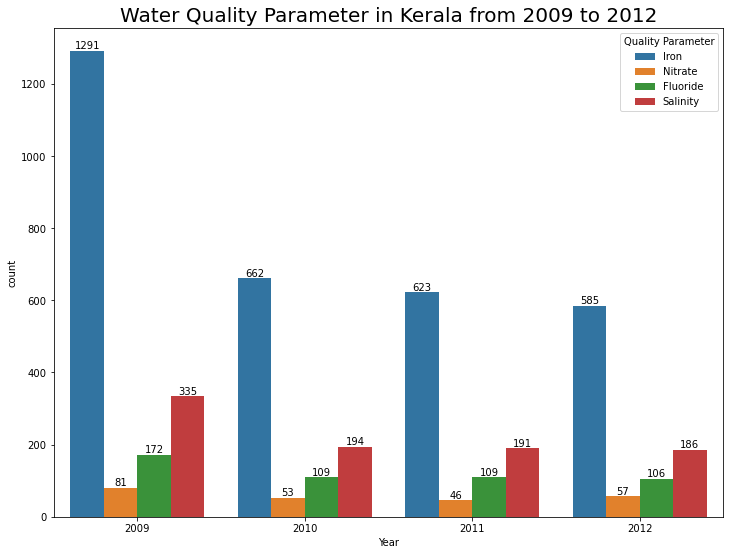

In [24]:
plt.figure(figsize=(12,9))
ax= sns.countplot(data_kerala['Year'], hue=data_kerala['Quality Parameter'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
ax.bar_label(ax.containers[3]);
plt.title('Water Quality Parameter in Kerala from 2009 to 2012', size=20);

In [25]:
#we van futher annalyse the quality in each district/panchayat